In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from pathlib import Path

In [22]:
# Load file
csv = Path("../Resources/vaccination-data.csv")

# Read dataset
who_data = pd.read_csv(csv)

who_data.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Argentina,ARG,AMRO,REPORTING,2022-10-07,109652736.0,41324100,242.617,91.434,37840119,83.725,NaN,2020-12-29,7.0,30810184.0,68.170
1,Australia,AUS,WPRO,REPORTING,2023-07-06,68247343.0,22216819,267.638,87.125,21627933,84.816,NaN,2021-02-21,5.0,14406392.0,56.496
2,Bahrain,BHR,EMRO,REPORTING,2022-12-21,3476633.0,1241174,204.319,72.943,1226796,72.098,NaN,2020-11-04,11.0,1008663.0,59.278
3,British Virgin Islands,VGB,AMRO,REPORTING,2023-06-02,41453.0,19466,137.094,64.378,18261,60.393,NaN,2021-02-11,3.0,3726.0,12.323
4,Egypt,EGY,EMRO,REPORTING,2023-05-21,112673535.0,56907319,110.103,55.609,42337175,41.371,NaN,2021-01-24,10.0,15217352.0,14.870


/var/folders/zw/kqxgh3ws15l27fz7ytgbylgm0000gn/T/ipykernel_38618/2354938261.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regions_data = who_data.groupby('WHO_REGION').sum()['TOTAL_VACCINATIONS']


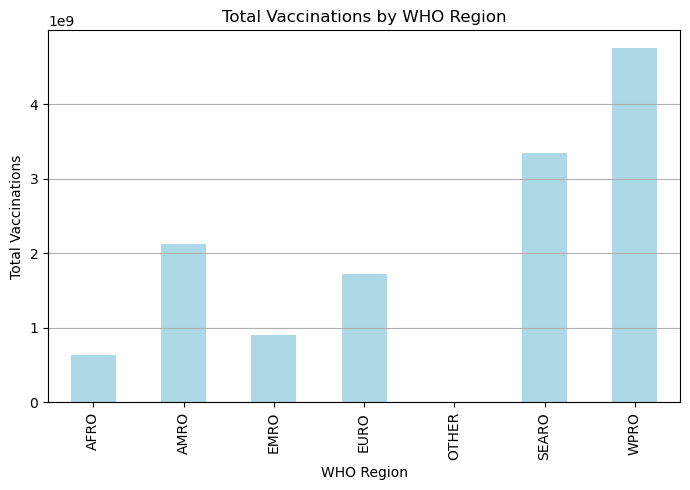

In [43]:
# Compare vaccination rates across different WHO regions
regions_data = who_data.groupby('WHO_REGION').sum()['TOTAL_VACCINATIONS']

plt.figure(figsize=(7,5))
regions_data.plot(kind='bar', color='lightblue')
plt.title("Total Vaccinations by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Total Vaccinations")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [26]:
# Clean data using headers

cleaned_who_data = who_data[['DATE_UPDATED', 'COUNTRY', 'TOTAL_VACCINATIONS', 'PERSONS_BOOSTER_ADD_DOSE', 'VACCINES_USED']]

# Rename the header to proper format
cleaned_who_data = cleaned_who_data.rename(columns={
    'DATE_UPDATED': 'Date Updated',
    'COUNTRY': 'Country',
    'TOTAL_VACCINATIONS': 'Total Vaccinations',
    'PERSONS_BOOSTER_ADD_DOSE': 'Persons with Booster Dose',
    'VACCINES_USED': 'Vaccines Used'
})
cleaned_who_data = cleaned_who_data.set_index('Date Updated')

cleaned_who_data

,Country,Total Vaccinations,Persons with Booster Dose,Vaccines Used
Date Updated,,,,
2022-10-07,Argentina,109652736.0,30810184.0,NaN
2023-07-06,Australia,68247343.0,14406392.0,NaN
2022-12-21,Bahrain,3476633.0,1008663.0,NaN
2023-06-02,British Virgin Islands,41453.0,3726.0,NaN
2023-05-21,Egypt,112673535.0,15217352.0,NaN
...,...,...,...,...
2023-06-11,Spain,112837406.0,26563654.0,NaN
2023-06-11,Switzerland,16755470.0,4996200.0,NaN
2023-04-18,Syrian Arab Republic,5090630.0,75881.0,NaN


In [44]:
top_vaccinated = cleaned_who_data.groupby('Country').max().sort_values(by='Total Vaccinations', ascending=False).head(5)
print("Top 5 Countries with the Most Vaccinations:")
print(top_vaccinated['Total Vaccinations'])

Top 5 Countries with the Most Vaccinations:
Country
China                       3.515873e+09
India                       2.206738e+09
United States of America    6.688820e+08
Brazil                      5.133297e+08
Indonesia                   4.475958e+08
Name: Total Vaccinations, dtype: float64


In [45]:
top_booster_doses = cleaned_who_data.groupby('Country').max().sort_values(by='Persons with Booster Dose', ascending=False).head(5)
print("\nTop 5 Countries with the Most Booster Doses:")
print(top_booster_doses['Persons with Booster Dose'])



Top 5 Countries with the Most Booster Doses:
Country
China                       833820382.0
India                       228793041.0
United States of America    116629517.0
Brazil                      110382337.0
Japan                        86554783.0
Name: Persons with Booster Dose, dtype: float64


In [46]:
print("\nSummary Statistics for Total Vaccinations:")
print(cleaned_who_data['Total Vaccinations'].describe())



Summary Statistics for Total Vaccinations:
count    2.280000e+02
mean     5.917660e+07
std      2.838736e+08
min      1.170000e+02
25%      4.733035e+05
50%      4.705035e+06
75%      2.335730e+07
max      3.515873e+09
Name: Total Vaccinations, dtype: float64


In [47]:
unique_vaccines = cleaned_who_data.groupby('Country')['Vaccines Used'].nunique()
print("\nNumber of Unique Vaccines Used per Country:")
print(unique_vaccines)



Number of Unique Vaccines Used per Country:
Country
Afghanistan                       0
Albania                           0
Algeria                           0
American Samoa                    0
Andorra                           0
                                 ..
Wallis and Futuna                 0
Yemen                             0
Zambia                            0
Zimbabwe                          0
occupied Palestinian territory    0
Name: Vaccines Used, Length: 229, dtype: int64


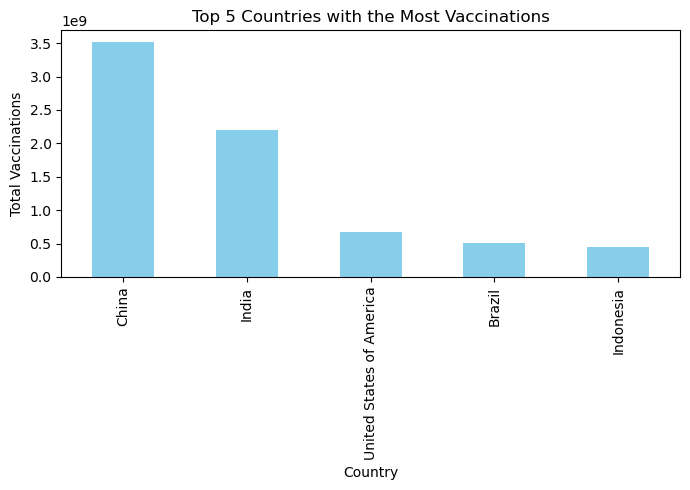

In [55]:
# Plotting the Top 5 Countries with the Most Vaccinations

plt.figure(figsize=(7, 5))
top_vaccinated['Total Vaccinations'].plot(kind='bar', color='skyblue')
plt.title("Top 5 Countries with the Most Vaccinations")
plt.ylabel("Total Vaccinations")
plt.tight_layout()
plt.show()

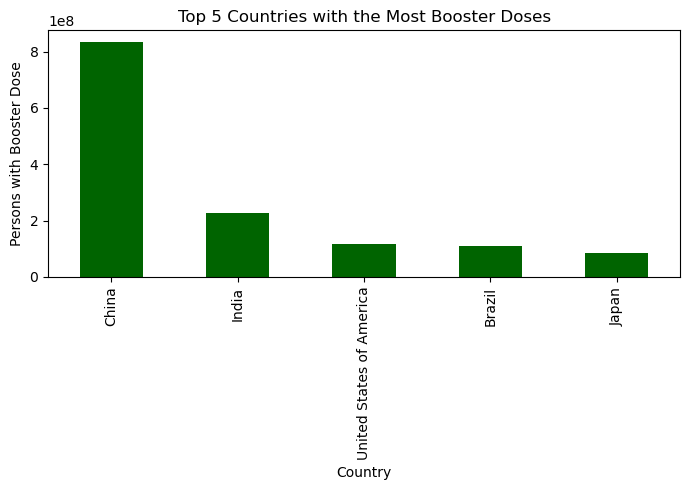

In [54]:
# Plotting the Top 5 Countries with the Most Booster Doses
plt.figure(figsize=(7, 5))
top_booster_doses['Persons with Booster Dose'].plot(kind='bar', color='darkgreen')
plt.title("Top 5 Countries with the Most Booster Doses")
plt.ylabel("Persons with Booster Dose")
plt.tight_layout()
plt.show()

In [66]:
# Show United States' vaccination rate
us_who_data = cleaned_who_data[cleaned_who_data['Country']=='United States of America']

us_who_data.isnull().sum()

Country                      0
Total Vaccinations           0
Persons with Booster Dose    0
Vaccines Used                1
Year                         0
Month                        0
Day                          0
dtype: int64

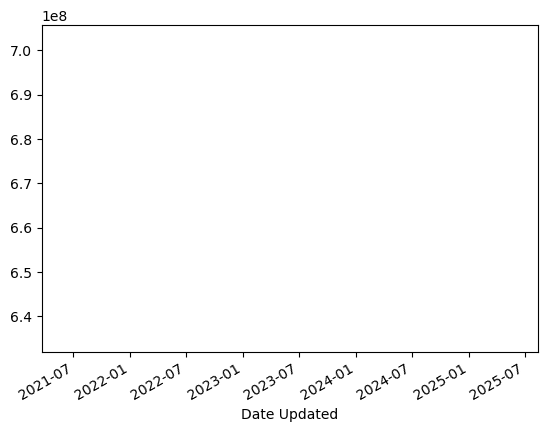

In [62]:
%matplotlib inline

us_who_data['Total Vaccinations'].plot()
plt.show()

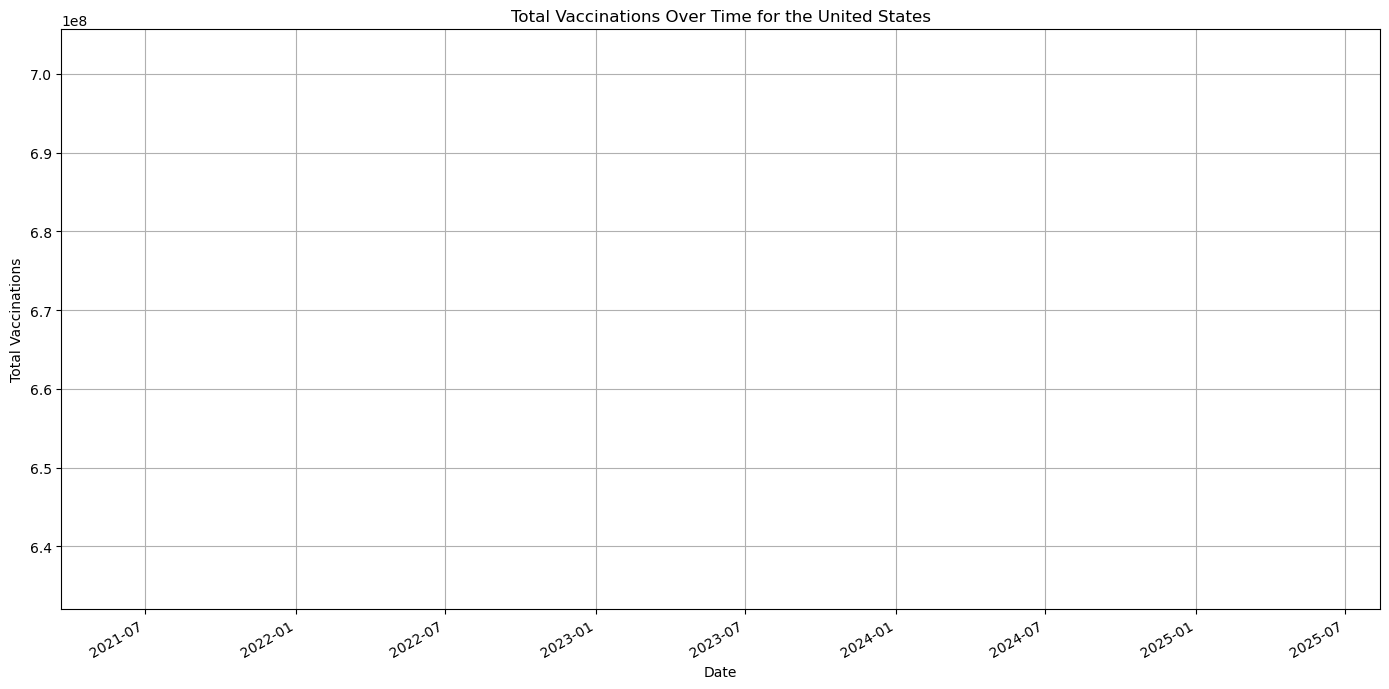

In [59]:

plt.figure(figsize=(14, 7))
us_who_data['Total Vaccinations'].plot()
plt.title("Total Vaccinations Over Time for the United States")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.grid(True)
plt.tight_layout()
plt.show()


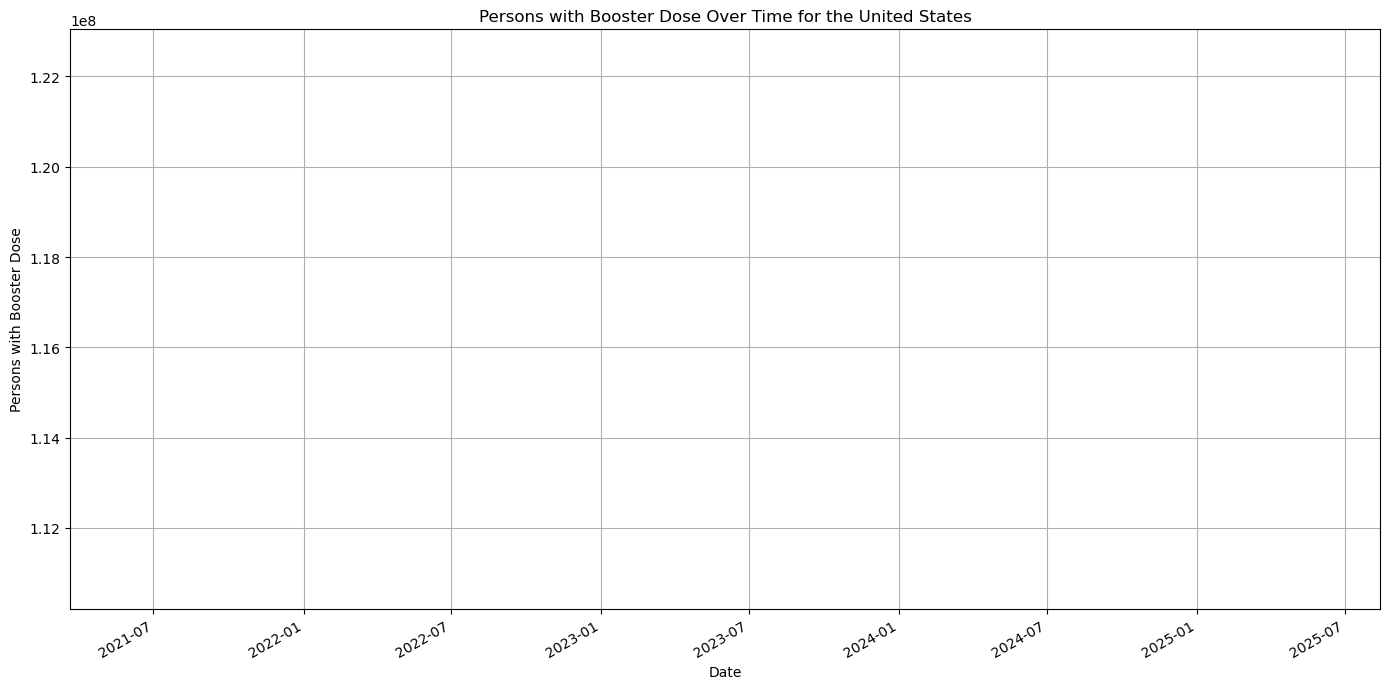

In [60]:
plt.figure(figsize=(14, 7))
us_who_data['Persons with Booster Dose'].plot(color='lightcoral')
plt.title("Persons with Booster Dose Over Time for the United States")
plt.xlabel("Date")
plt.ylabel("Persons with Booster Dose")
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
# Sum of total vaccination in United States of America
us_who_data['TOTAL_VACCINATIONS'].sum()

668882018.0

In [77]:
# Sum of total vaccination and at least one additional booster in United States of America
us_who_data['PERSONS_BOOSTER_ADD_DOSE'].sum()

116629517.0

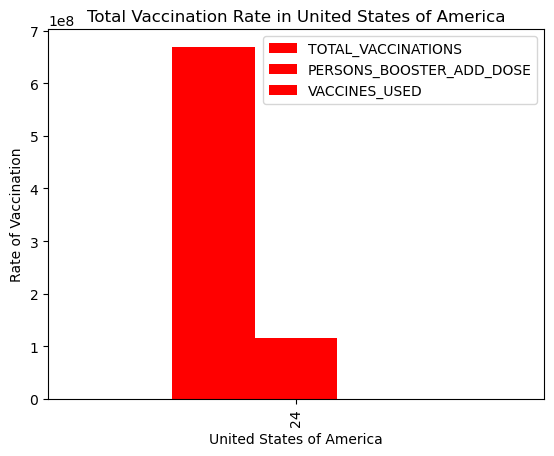

In [99]:
# Create the bar chart
bar_chart = us_who_data.plot.bar(color='r')
plt.xlabel("United States of America")
plt.ylabel("Rate of Vaccination")
plt.title("Total Vaccination Rate in United States of America")
plt.show()

In [78]:
# Type of vaccine administered
us_who_vaccine_type = us_who_data['VACCINES_USED']
us_who_vaccine_type.head()

24   NaN
Name: VACCINES_USED, dtype: float64

In [79]:
# Show Italy's vaccination rate
italy_who_data = cleaned_who_data[cleaned_who_data['COUNTRY']=='Italy']
italy_who_data.head()

,DATE_UPDATED,COUNTRY,TOTAL_VACCINATIONS,PERSONS_BOOSTER_ADD_DOSE,VACCINES_USED
209,2023-06-11,Italy,150317622.0,44916242.0,NaN


In [82]:
# Sum of total vaccination in Italy 
italy_who_data['TOTAL_VACCINATIONS'].sum()

150317622.0

In [84]:
# Sum of total vaccination and at least one additional booster in Italy
italy_who_data['PERSONS_BOOSTER_ADD_DOSE'].sum()

44916242.0

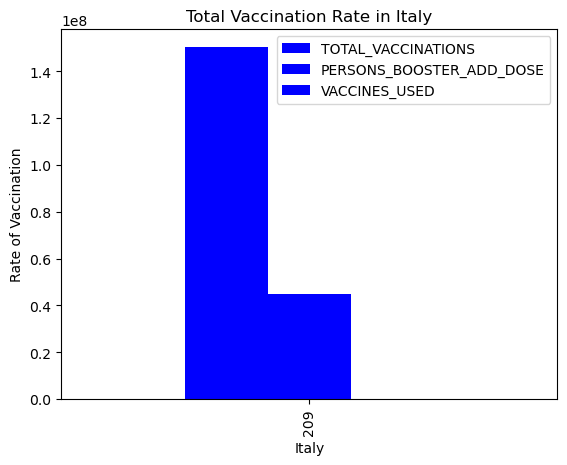

In [100]:
# Create the bar chart
bar_chart = italy_who_data.plot.bar(color='b')
plt.xlabel("Italy")
plt.ylabel("Rate of Vaccination")
plt.title("Total Vaccination Rate in Italy")
plt.show()

In [86]:
# Type of vaccine administered
italy_who_vaccine_type = italy_who_data['VACCINES_USED']
italy_who_vaccine_type.head()

209   NaN
Name: VACCINES_USED, dtype: float64

In [80]:
# China's vaccination rate
china_who_data = cleaned_who_data[cleaned_who_data['COUNTRY']=='China']
china_who_data.head()

,DATE_UPDATED,COUNTRY,TOTAL_VACCINATIONS,PERSONS_BOOSTER_ADD_DOSE,VACCINES_USED
183,2023-03-23,China,3.515873e+09,833820382.0,NaN


In [87]:
# Sum of total vaccination in China
china_who_data['TOTAL_VACCINATIONS'].sum()

3515872818.0

In [88]:
# Sum of total vaccination and at least one additional booster in China
china_who_data['PERSONS_BOOSTER_ADD_DOSE'].sum()

833820382.0

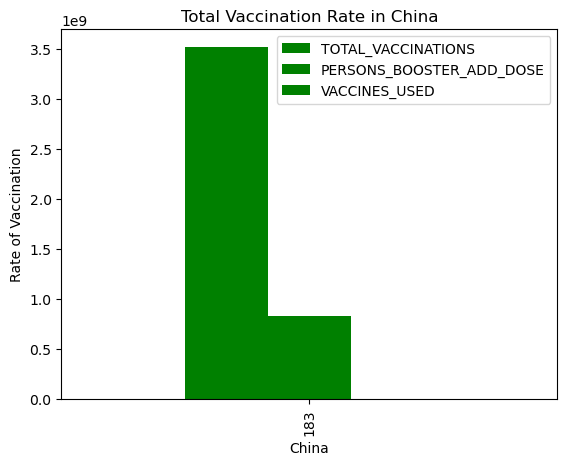

In [101]:
# Create the bar chart
bar_chart = china_who_data.plot.bar(color='g')
plt.xlabel("China")
plt.ylabel("Rate of Vaccination")
plt.title("Total Vaccination Rate in China")
plt.show()

In [89]:
# Type of vaccine administered
china_who_vaccine_type = china_who_data['VACCINES_USED']
china_who_vaccine_type.head()

183   NaN
Name: VACCINES_USED, dtype: float64